In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from skimage import draw
from skimage.transform import resize
import matplotlib
matplotlib.rcParams.update({'font.size': 16})

from euclid_morphology import cutouts

In [3]:
repo_root = Path(os.path.dirname(os.getcwd()))
data_dir = repo_root / 'data/example_tile'

catalog_file = data_dir / 'EUC_MER_FINAL-CUTOUTS-CAT_TILE100158586-2F9FF9_20220829T221845.491503Z_00.00.fits'
mosaic_file = data_dir / 'EUC_MER_BGSUB-MOSAIC-VIS_TILE100158586-863FA9_20220829T190315.054985Z_00.00.fits'
segmentation_file = data_dir / 'EUC_MER_FINAL-SEGMAP_TILE100158586-CB5786_20220829T221845.491530Z_00.00.fits'


In [4]:
image, seg, catalog = cutouts.load_data_for_mosaic(catalog_file, segmentation_file, mosaic_file)

In [42]:
source_index = 400

In [43]:
cutout = cutouts.get_cutout(image, catalog.iloc[source_index])
plt.imshow(cutout)

In [61]:
%%timeit
cutout = cutouts.get_cutout(image, catalog.iloc[source_index])

82.3 µs ± 45.3 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


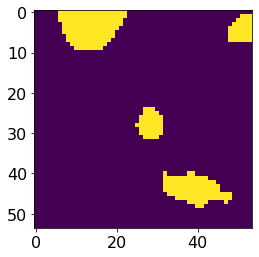

In [50]:
# also works on seg
seg_cutout = cutouts.get_cutout(seg, catalog.iloc[source_index])
plt.imshow(seg_cutout)

In [51]:
galaxy = catalog.iloc[source_index]

In [53]:
galaxy['x1'] - galaxy['x0']

53.42741998031124

In [57]:
galaxy['CORNER_3_DEC'] - galaxy['CORNER_0_DEC']

0.0014882386477239606

In [58]:
galaxy['CORNER_1_RA'] - galaxy['CORNER_0_RA']

-0.003484769518934172

In [59]:
galaxy

OBJECT_ID               2.701059e+18
RIGHT_ASCENSION         2.701059e+02
DECLINATION             6.479404e+01
CORNER_0_RA             2.701077e+02
CORNER_0_DEC            6.479330e+01
CORNER_1_RA             2.701043e+02
CORNER_1_DEC            6.479330e+01
CORNER_2_RA             2.701043e+02
CORNER_2_DEC            6.479478e+01
CORNER_3_RA             2.701077e+02
CORNER_3_DEC            6.479478e+01
SEMIMAJOR_AXIS          1.857606e+00
SEMIMINOR_AXIS          1.537559e+00
POSITION_ANGLE          8.432642e+01
PARENT_ID              -1.000000e+00
PARENT_VISNIR          -1.000000e+00
FLUX_DETECTION_TOTAL    5.415401e-01
x                       1.730553e+04
y                       2.215041e+03
x0                      1.727800e+04
y0                      2.188000e+03
x1                      1.733143e+04
y1                      2.188424e+03
x2                      1.733100e+04
y2                      2.242000e+03
x3                      1.727758e+04
y3                      2.241576e+03
S

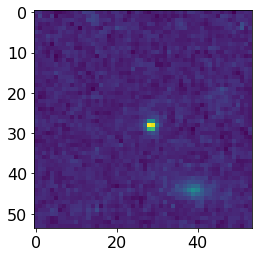

In [46]:
cutout = cutouts.prepare_image(image, seg, catalog, source_index, mode='seg', m=1.5)

In [47]:
cutout.shape

(1, 300, 300, 1)

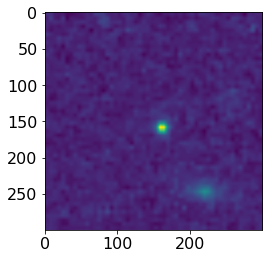

In [48]:
plt.imshow(cutout[0])

In [60]:
%%timeit
cutout = cutouts.prepare_image(image, seg, catalog, source_index, mode='seg', m=1.5)

1.49 ms ± 2.74 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
